## Data science notebooks & data analysis
Notebooks are great for interactive data analysis. Let's create a pandas DataFrame using the `read_csv()` function. 

We will load the dataset "chocolate_bars.csv" containing different characteristics of over 2,500 chocolate bars and their reviews.

By using the `.head()` method, we display the first five rows of data:

In [1]:
#import useful libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import missingno as msno
plt.style.use('ggplot')



### Data Wrangling

In [2]:
# Reading in the data
df = pd.read_csv('data/chocolate_bars.csv')

# Take a look at the first datapoints
df.head()

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00


In [3]:
df.columns

Index(['id', 'manufacturer', 'company_location', 'year_reviewed',
       'bean_origin', 'bar_name', 'cocoa_percent', 'num_ingredients',
       'ingredients', 'review', 'rating'],
      dtype='object')

In [4]:
df.shape

(2530, 11)

We have 11 column and 2530 row of data 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2530 entries, 0 to 2529
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                2530 non-null   int64  
 1   manufacturer      2530 non-null   object 
 2   company_location  2530 non-null   object 
 3   year_reviewed     2530 non-null   int64  
 4   bean_origin       2530 non-null   object 
 5   bar_name          2530 non-null   object 
 6   cocoa_percent     2530 non-null   float64
 7   num_ingredients   2443 non-null   float64
 8   ingredients       2443 non-null   object 
 9   review            2530 non-null   object 
 10  rating            2530 non-null   float64
dtypes: float64(3), int64(2), object(6)
memory usage: 217.5+ KB


In [6]:
df.isna().sum()

id                   0
manufacturer         0
company_location     0
year_reviewed        0
bean_origin          0
bar_name             0
cocoa_percent        0
num_ingredients     87
ingredients         87
review               0
rating               0
dtype: int64

#### As We See There is missing Data in num_ingredients and ingredients columns 
As they is only 87 row we can drop them 

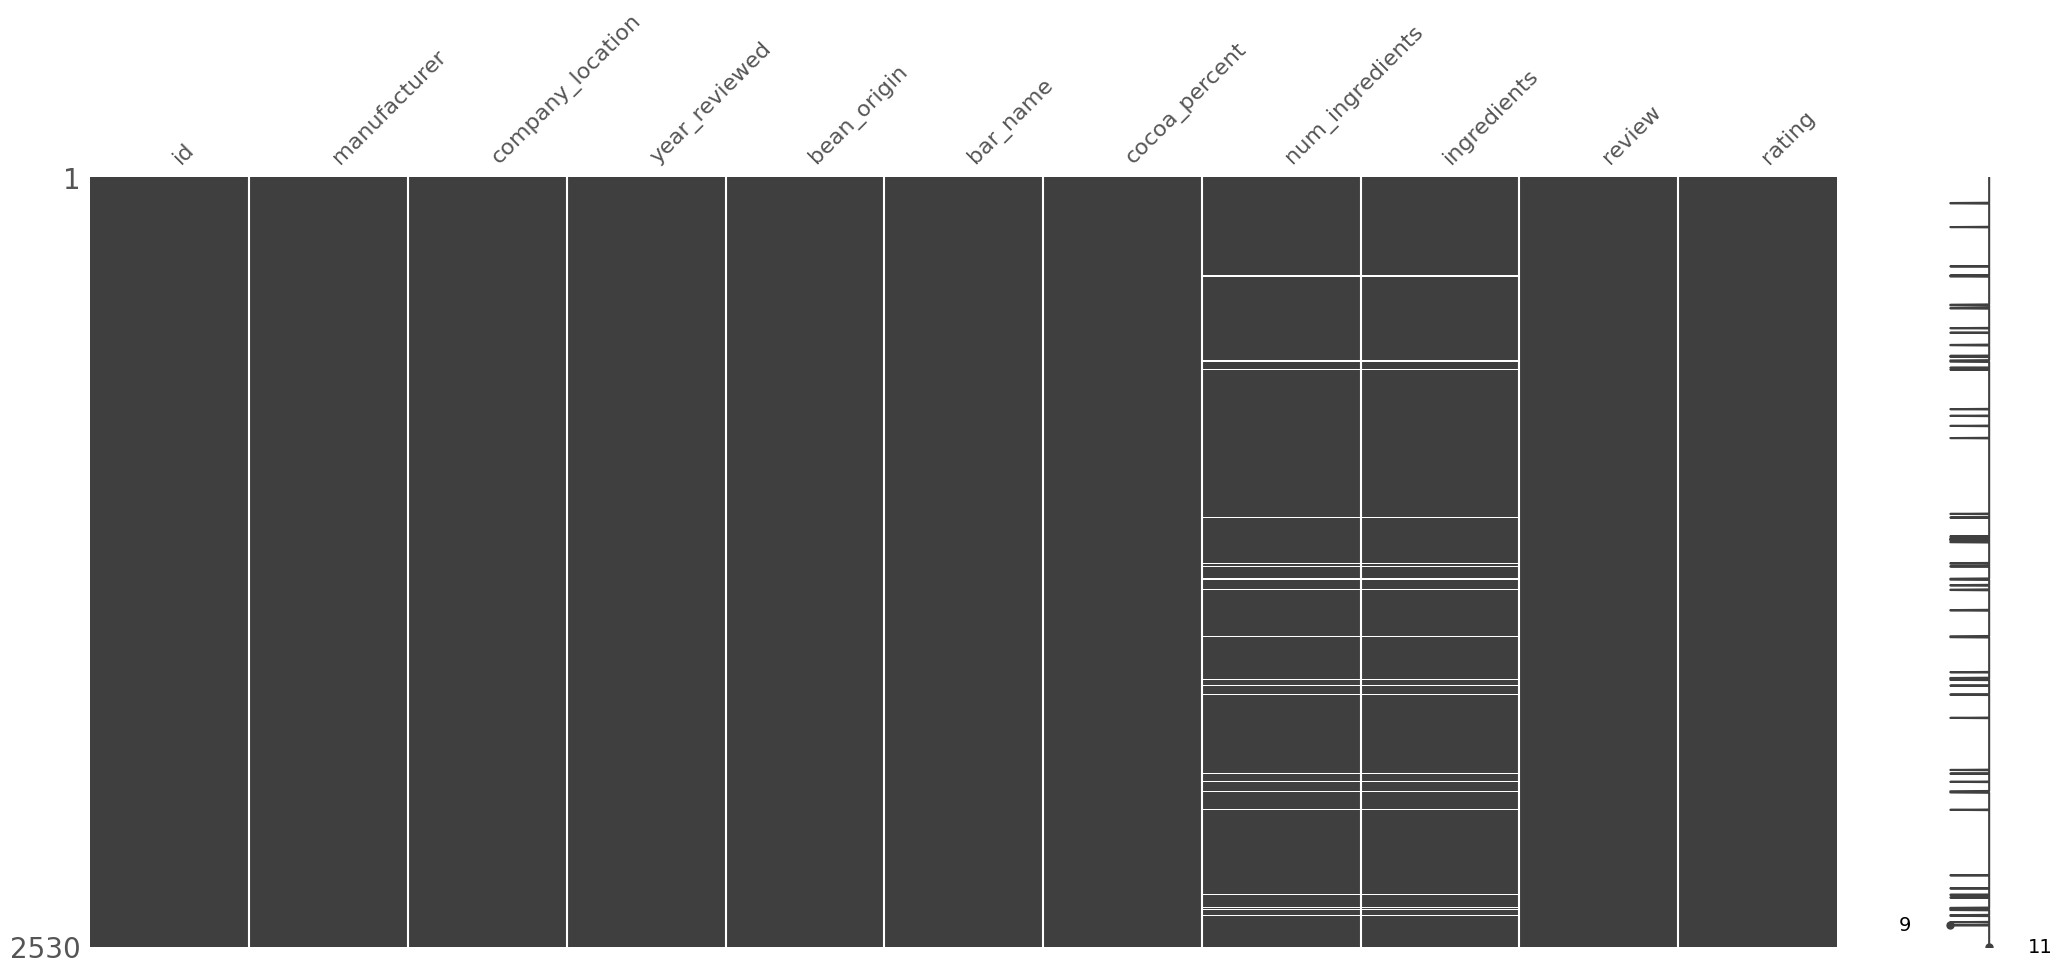

In [7]:
msno.matrix(df)
plt.show()

We see that missing data are randomly scattered throughout the column but realy that is the case ?

In [8]:
missingOF_num_ingredients  = df[df['num_ingredients'].isna()]
completeOF_num_ingredients = df[~df['num_ingredients'].isna()] 

In [9]:
missingOF_num_ingredients.describe()

,id,year_reviewed,cocoa_percent,num_ingredients,rating
count,87.000000,87.000000,87.000000,0.0,87.000000
mean,819.908046,2011.241379,75.655172,NaN,2.810345
std,531.408673,2.840592,12.476795,NaN,0.681958
min,48.000000,2006.000000,55.000000,NaN,1.000000
25%,404.000000,2009.000000,70.000000,NaN,2.500000
50%,701.000000,2011.000000,70.000000,NaN,3.000000
75%,1058.000000,2013.000000,80.000000,NaN,3.250000
max,2084.000000,2018.000000,100.000000,NaN,4.000000


In [10]:
completeOF_num_ingredients.describe()

,id,year_reviewed,cocoa_percent,num_ingredients,rating
count,2443.000000,2443.000000,2443.000000,2443.000000,2443.00000
mean,1451.520262,2014.485878,71.496725,3.041343,3.21009
std,755.521714,3.957507,5.156974,0.913728,0.42837
min,5.000000,2006.000000,42.000000,1.000000,1.00000
25%,833.000000,2012.000000,70.000000,2.000000,3.00000
50%,1474.000000,2015.000000,70.000000,3.000000,3.25000
75%,2100.000000,2018.000000,74.000000,4.000000,3.50000
max,2712.000000,2021.000000,100.000000,6.000000,4.00000


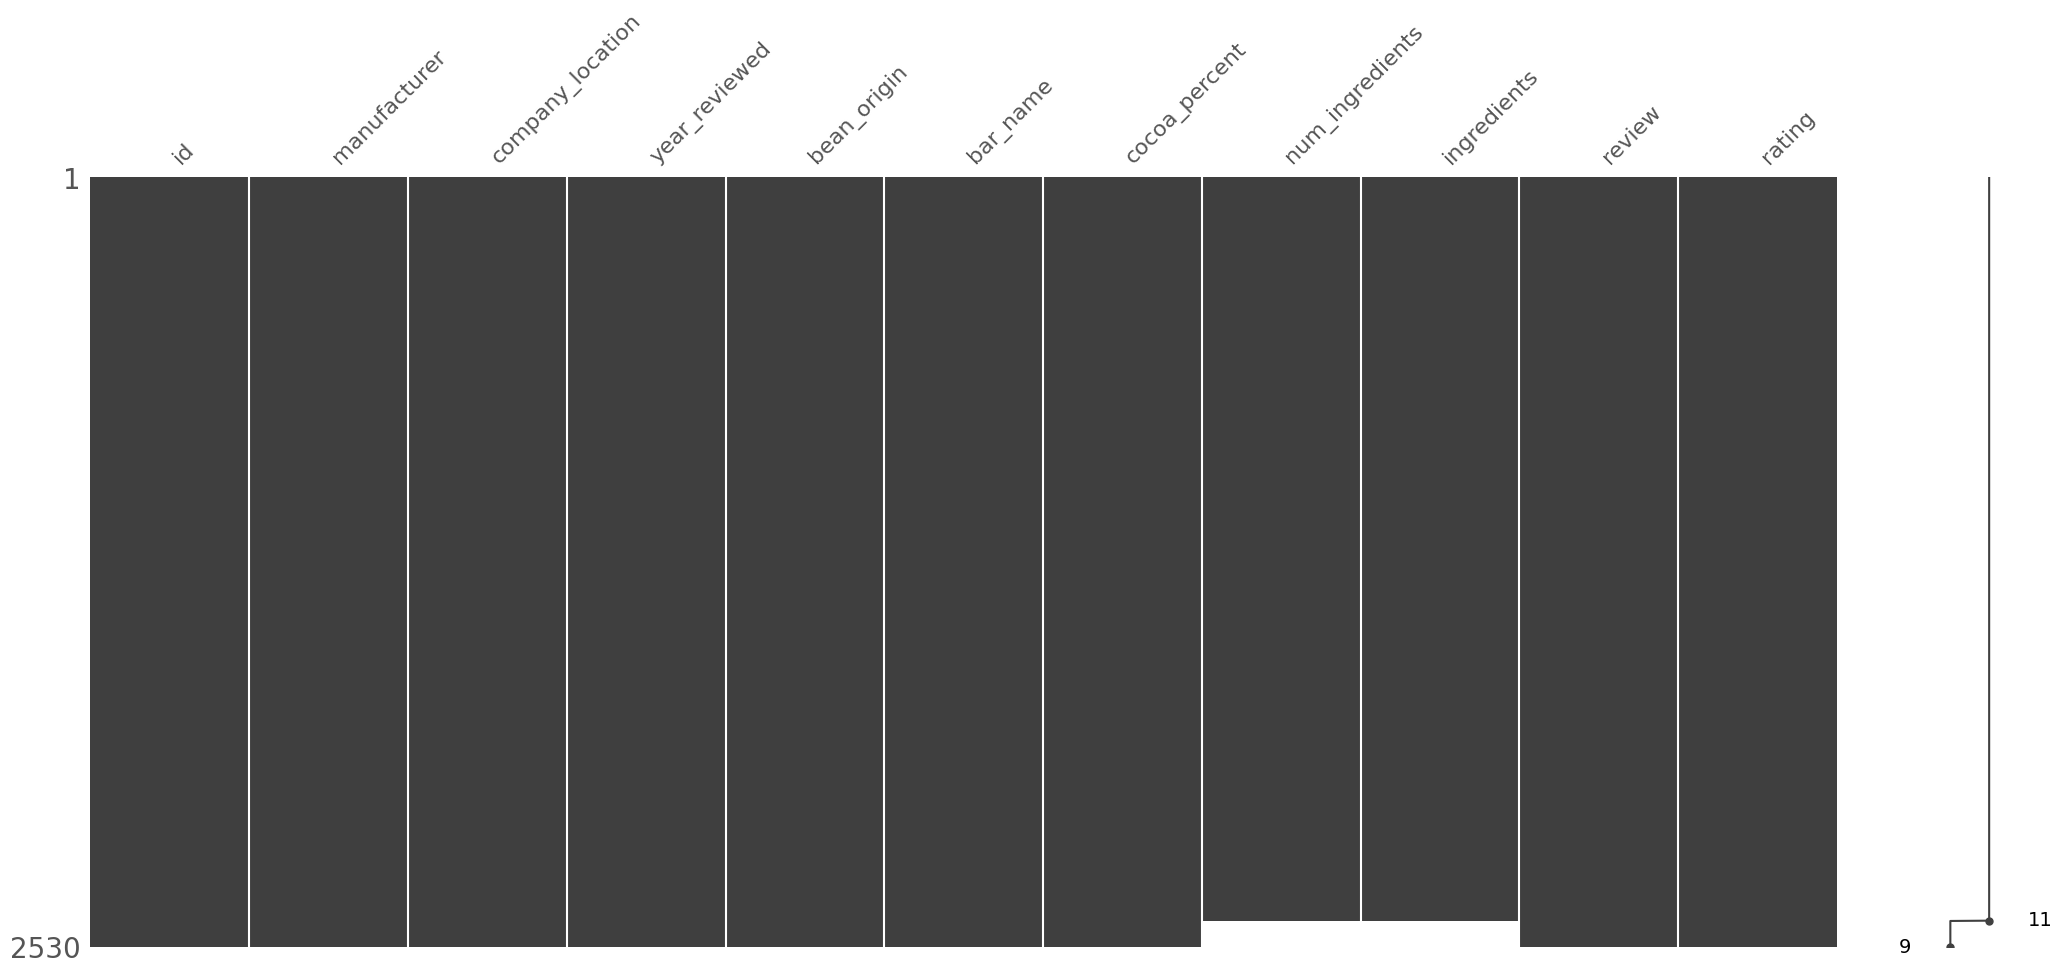

In [11]:
sorted_num_ingredients= df.sort_values(by = 'ingredients')
msno.matrix(sorted_num_ingredients)
plt.show()

missing of data happen in large number of num_ingredients 

In [12]:
df = df.dropna(subset =['num_ingredients','ingredients'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2443 entries, 0 to 2529
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                2443 non-null   int64  
 1   manufacturer      2443 non-null   object 
 2   company_location  2443 non-null   object 
 3   year_reviewed     2443 non-null   int64  
 4   bean_origin       2443 non-null   object 
 5   bar_name          2443 non-null   object 
 6   cocoa_percent     2443 non-null   float64
 7   num_ingredients   2443 non-null   float64
 8   ingredients       2443 non-null   object 
 9   review            2443 non-null   object 
 10  rating            2443 non-null   float64
dtypes: float64(3), int64(2), object(6)
memory usage: 229.0+ KB


In [13]:
sum(df.duplicated())

0

There is no duplicated rows

#### Let's check our columns Types

In [14]:
df.dtypes

id                    int64
manufacturer         object
company_location     object
year_reviewed         int64
bean_origin          object
bar_name             object
cocoa_percent       float64
num_ingredients     float64
ingredients          object
review               object
rating              float64
dtype: object

In [15]:
df.memory_usage(deep=True)



Index                19544
id                   19544
manufacturer        165390
company_location    155128
year_reviewed        19544
bean_origin         159728
bar_name            181229
cocoa_percent        19544
num_ingredients      19544
ingredients         151781
review              195624
rating               19544
dtype: int64

In [16]:
df.year_reviewed = pd.to_datetime(df['year_reviewed'],format='%Y%m%d', errors='ignore')
df.year_reviewed

0       2019
1       2019
2       2019
3       2021
4       2021
        ... 
2525    2014
2526    2017
2527    2018
2528    2018
2529    2018
Name: year_reviewed, Length: 2443, dtype: object

In [17]:
df['company_location'] = df.company_location.astype('category')
df['ingredients'] = df.ingredients.astype('category')
df['bar_name'] = df.bar_name.astype('category')
df['bean_origin'] = df.bean_origin.astype('category')

In [18]:
#def to_Category(columnN):
  #  return df[columnN].astype('category')
    

In [19]:
df.dtypes

id                     int64
manufacturer          object
company_location    category
year_reviewed         object
bean_origin         category
bar_name            category
cocoa_percent        float64
num_ingredients      float64
ingredients         category
review                object
rating               float64
dtype: object

In [20]:
df.memory_usage(deep=True)

Index                19544
id                   19544
manufacturer        165390
company_location      8912
year_reviewed        87948
bean_origin           8587
bar_name            160702
cocoa_percent        19544
num_ingredients      19544
ingredients           4338
review              195624
rating               19544
dtype: int64

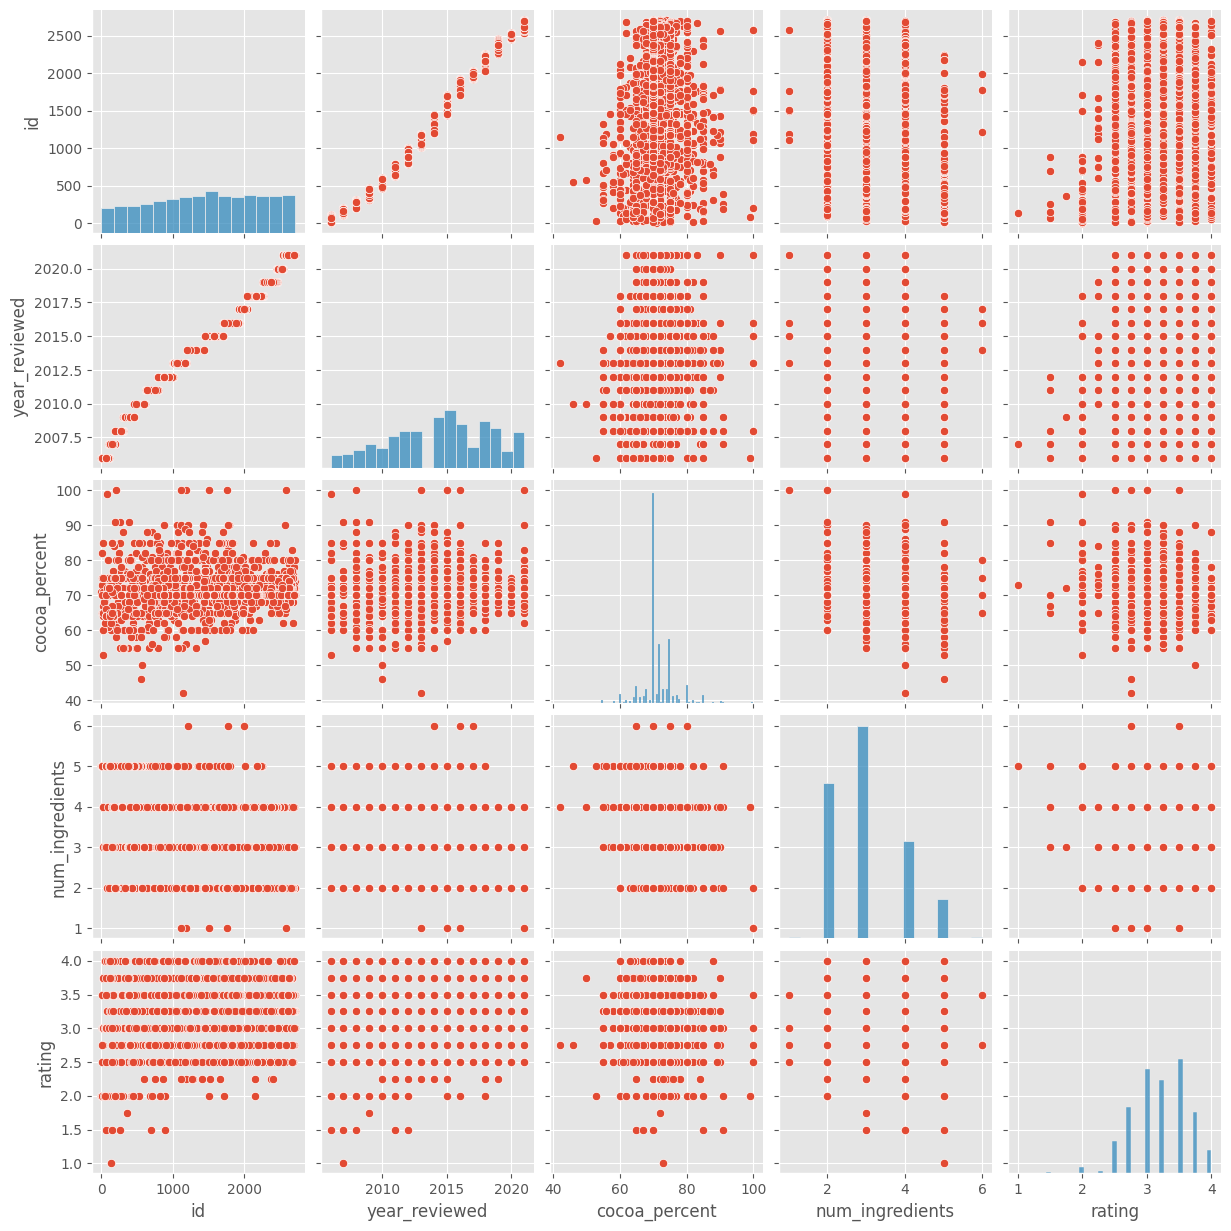

In [21]:
sns.pairplot(df)


In [22]:
# Compute the correlation coefficient for all column pairs
corr_columns = df.corr()
corr_columns

,id,cocoa_percent,num_ingredients,rating
id,1.000000,0.047576,-0.356845,0.085569
cocoa_percent,0.047576,1.000000,-0.187468,-0.077173
num_ingredients,-0.356845,-0.187468,1.000000,-0.098834
rating,0.085569,-0.077173,-0.098834,1.000000


#### We see that we reduce memory usage by converting this columns to category *company_location*  ,*bean_origin*,*ingredients* and *bar_name* 


## Exploratory Data Analysis

In [23]:
#function which will take any column as argument from and keep its track 
def data(column):
    #will take a column, and separate the string by ','
    data = df[column].str.cat(sep = ',')
    
    #giving pandas series and storing the values separately
    data = pd.Series(data.split(','))
    
    #arranging in descending order
    countM = data.value_counts(ascending = False)

    return countM


In [24]:
countReview = data('review')
countReview[:20]

 cocoa      206
 sweet      175
 nutty      173
creamy      161
 roasty     160
 earthy     141
sandy       139
 sour       122
 floral      91
intense      88
sweet        85
nutty        83
 fatty       83
 spicy       79
fatty        78
 fruit       70
 woody       68
sticky       65
 coffee      64
 vanilla     60
dtype: int64

In [25]:
countIngrad = data('ingredients')
countIngrad

B     2443
S     2360
C     1668
L      493
V      353
S*      76
Sa      37
dtype: int64

## What is The Avarage Rating by country  of origion?

In [26]:
bean_origin_rating = (
    df
    .groupby("bean_origin")
    .rating.mean()
    .reset_index()
    .sort_values(by='rating',ascending=False)
)
bean_origin_rating

,bean_origin,rating
7,China,3.500000
42,Sao Tome & Principe,3.500000
44,Solomon Islands,3.450000
9,Congo,3.318182
53,Thailand,3.300000
...,...,...
30,Martinique,2.750000
43,Sierra Leone,2.750000
38,Principe,2.750000
47,St.Vincent-Grenadines,2.750000


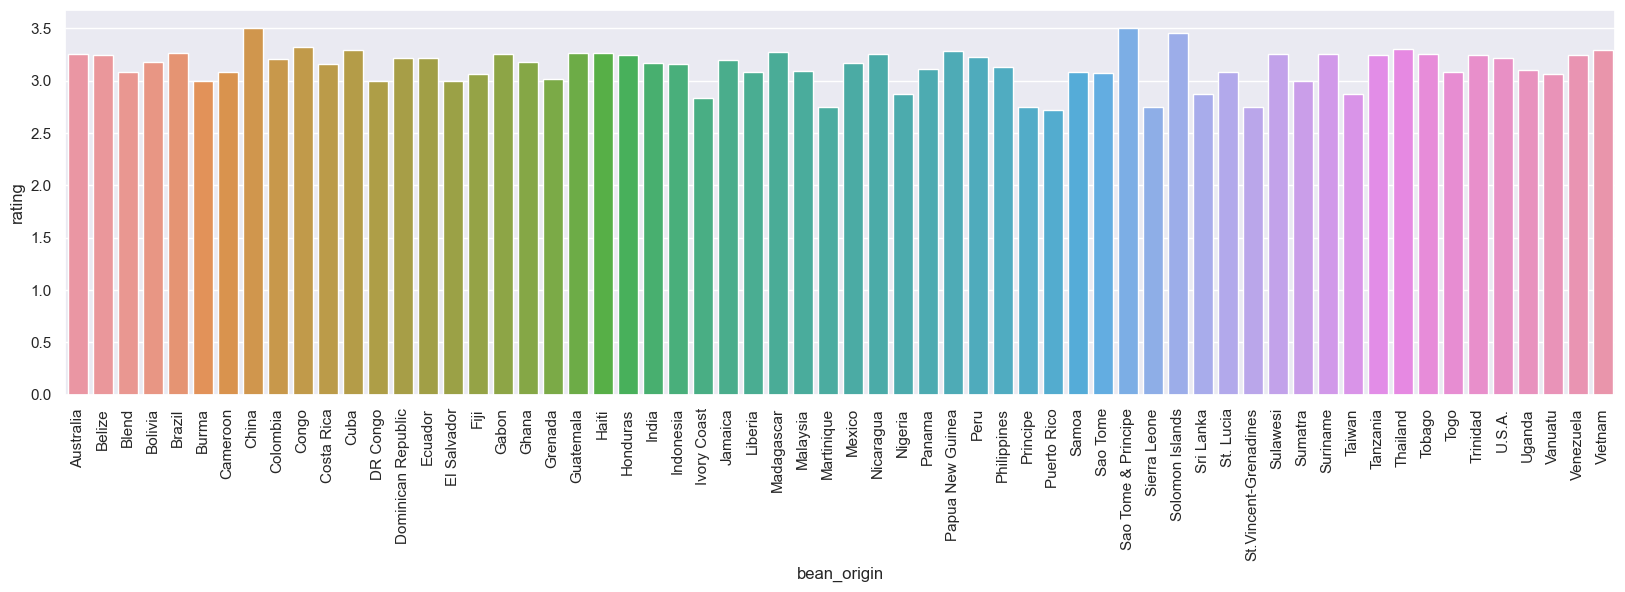

In [40]:
sns.set(rc = {'figure.figsize':(20,5)})
sns.barplot(x = "bean_origin", y = "rating", data = bean_origin_rating.sort_values(by = ['rating'],ascending =  False))
plt.xticks(rotation = 90)
plt.show()

### How many bars were reviewed for each of those countries?

In [52]:
bean_orig_bar_count=(df.
                     groupby("bean_origin").
                     bar_name.count().
                     reset_index().
                     sort_values(by='bar_name',ascending=False))
bean_orig_bar_count

,bean_origin,bar_name
60,Venezuela,246
36,Peru,231
13,Dominican Republic,220
14,Ecuador,201
28,Madagascar,171
...,...,...
50,Suriname,1
49,Sumatra,1
48,Sulawesi,1
47,St.Vincent-Grenadines,1


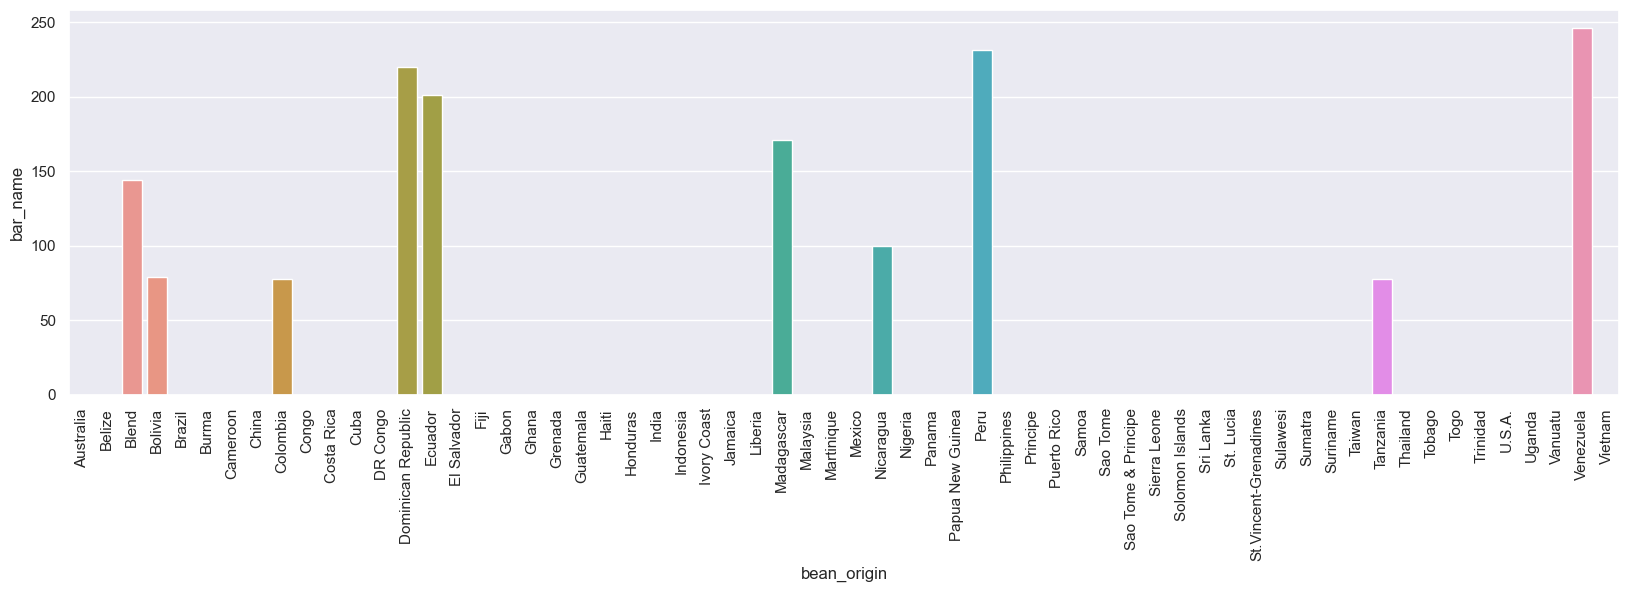

In [48]:
sns.barplot(x="bean_origin",y="bar_name",data =bean_orig_bar_count[0:10])
plt.xticks(rotation = 90)
plt.show()

In [49]:
bean_orig_bar_count=(df.
                     groupby("bean_origin").
                     bar_name.count().
                     reset_index().
                     sort_values(by='bar_name',ascending=False))
bean_orig_bar_count

,bean_origin,bar_name
60,Venezuela,246
36,Peru,231
13,Dominican Republic,220
14,Ecuador,201
28,Madagascar,171
...,...,...
50,Suriname,1
49,Sumatra,1
48,Sulawesi,1
47,St.Vincent-Grenadines,1


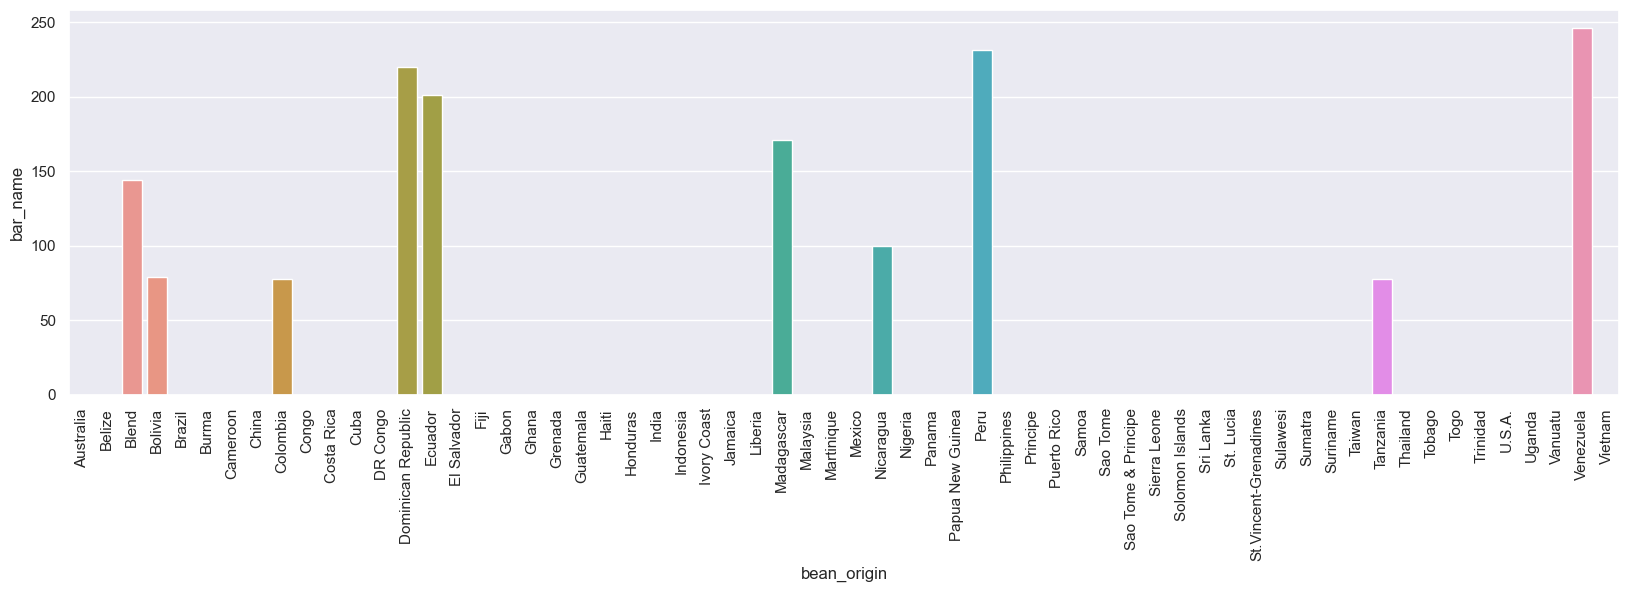

In [54]:
sns.barplot(x="bean_origin",y="bar_name",data=bean_orig_bar_count[0:10])
plt.xticks(rotation = 90)
plt.show()

### Is the cacao bean's origin an indicator of quality?

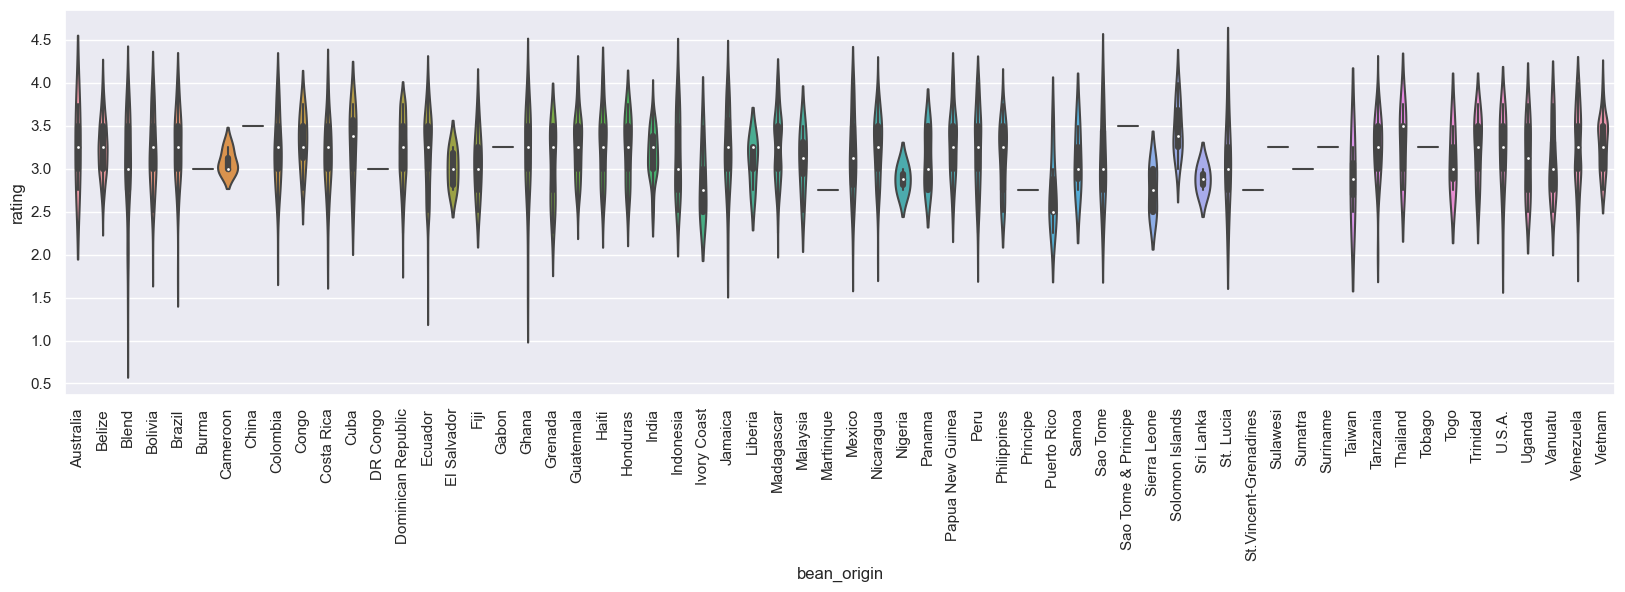

In [56]:
sns.violinplot(y="rating",x="bean_origin",data=df)
plt.xticks(rotation=90)
plt.show()

No ,it's not an indicator  

what is the relation of cocoa percent and rating

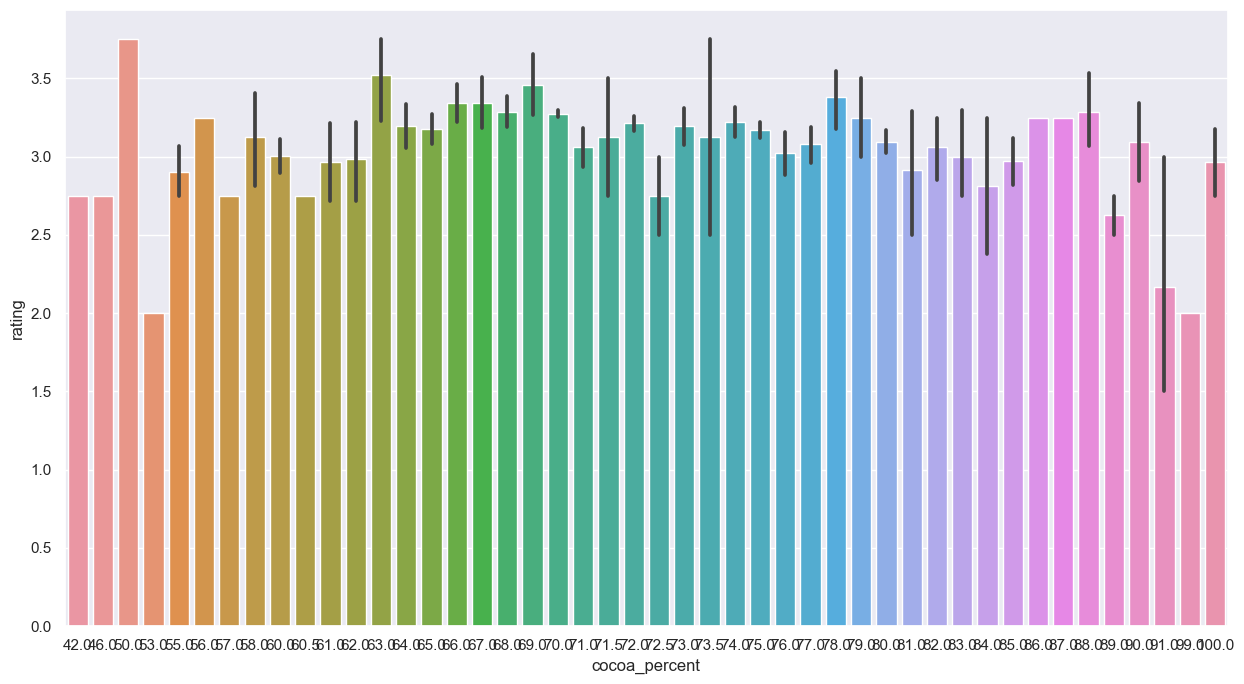

In [57]:
df = df.sort_values(by='cocoa_percent')
plt.figure(figsize=(15,8))

sns.barplot(x='cocoa_percent', y='rating', data=df)
plt.show()

Coca persent isn't an indicator of good quality

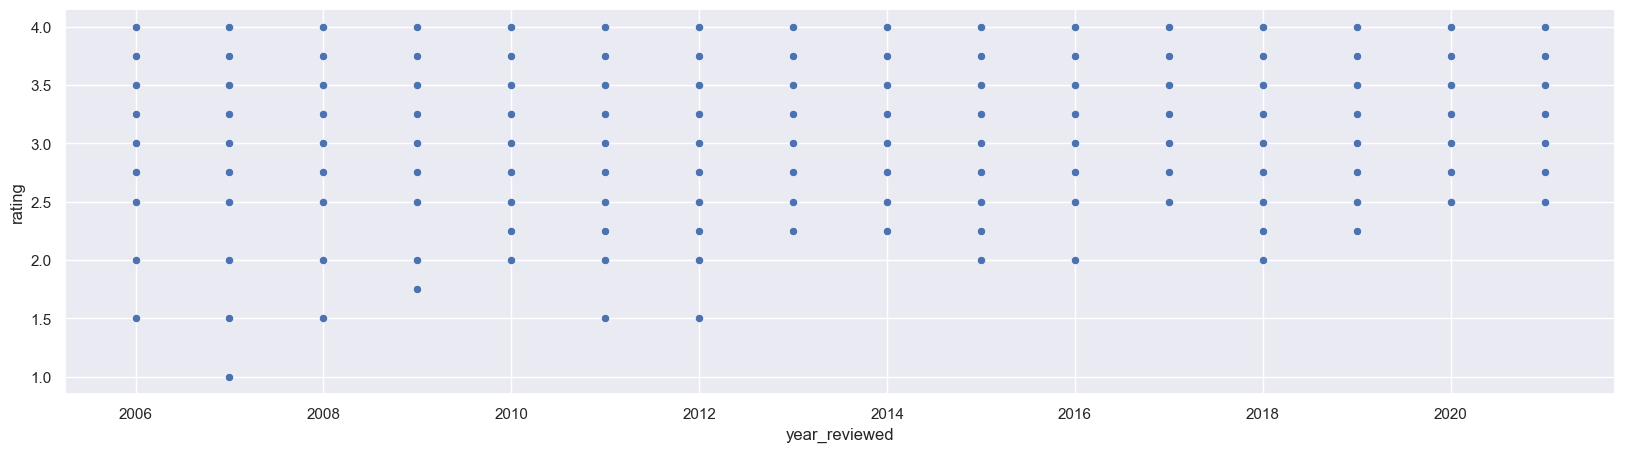

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='year_reviewed', y='rating', data=df)
plt.show()

We can also make a plot from the table we calculated above (average rating for chocolate bars with different numbers of ingredients):

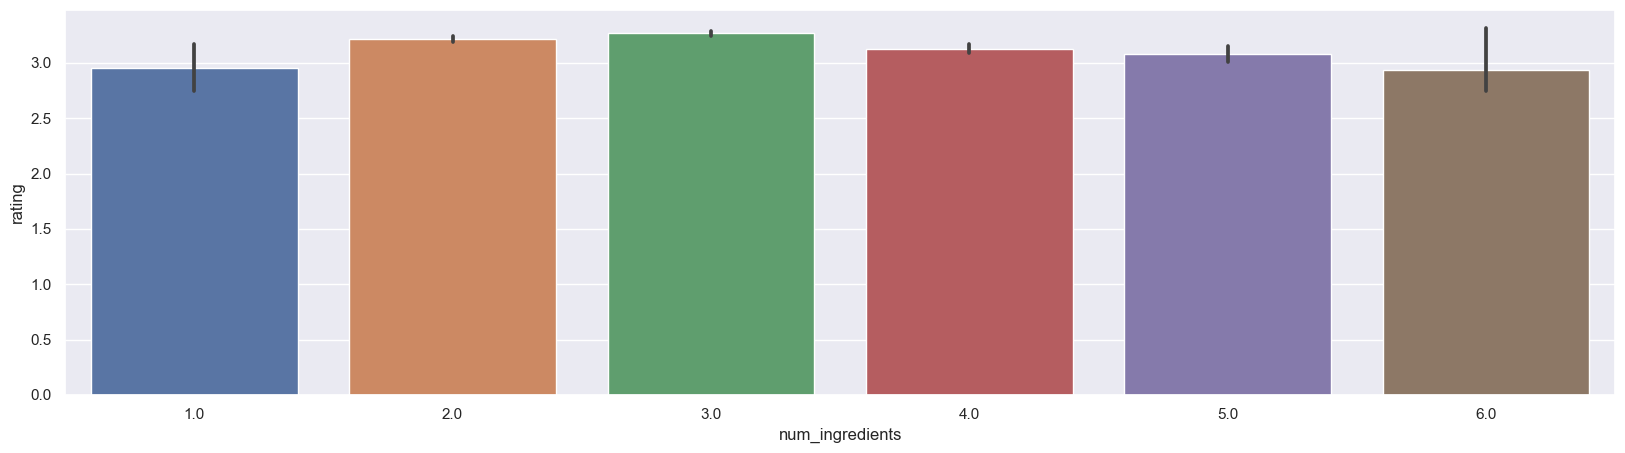

In [59]:
sns.barplot(x='num_ingredients', y='rating', data=df)
plt.show()

###  How does cocoa content relate to rating? What is the average cocoa content for bars with higher ratings (above 3.5)?

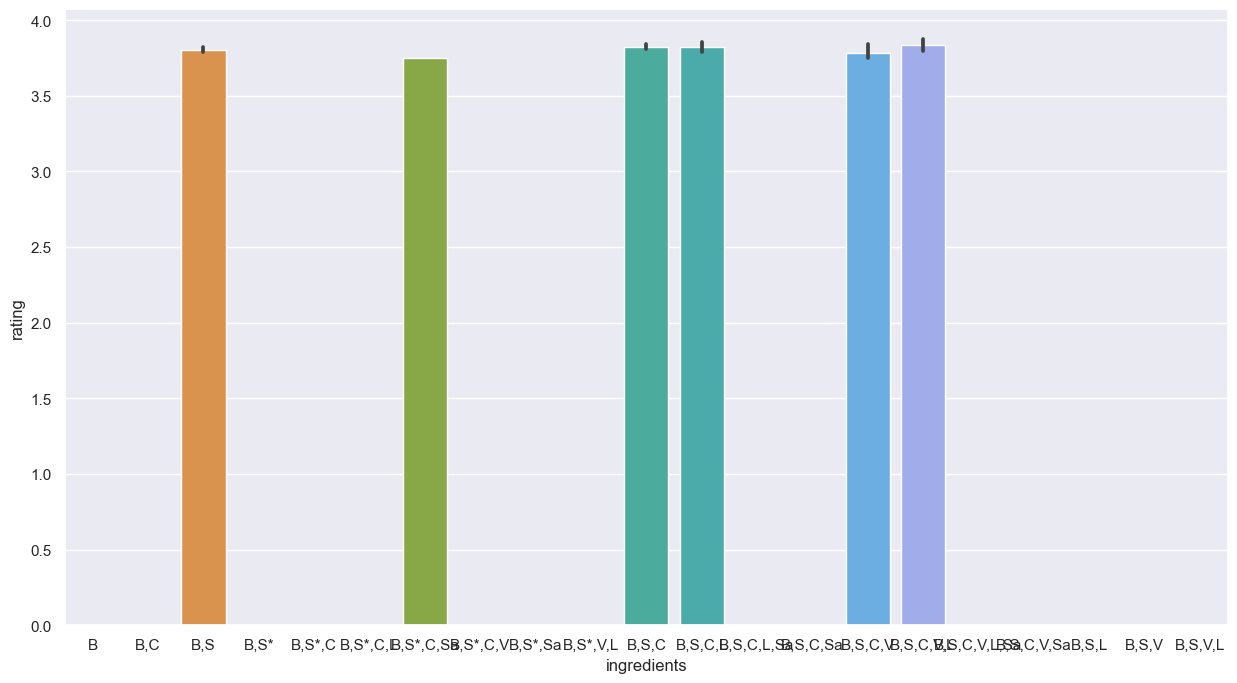

In [60]:

NewData = df[df['rating']>3.5]
plt.figure(figsize=(15,8))

sns.barplot(x = 'ingredients',y= 'rating', data =NewData)
plt.show()

In [61]:
Avgcocoa_percent = df[df['rating']>3.5].cocoa_percent.mean()
Avgcocoa_percent

70.99630541871922

<AxesSubplot:xlabel='rating', ylabel='cocoa_percent'>

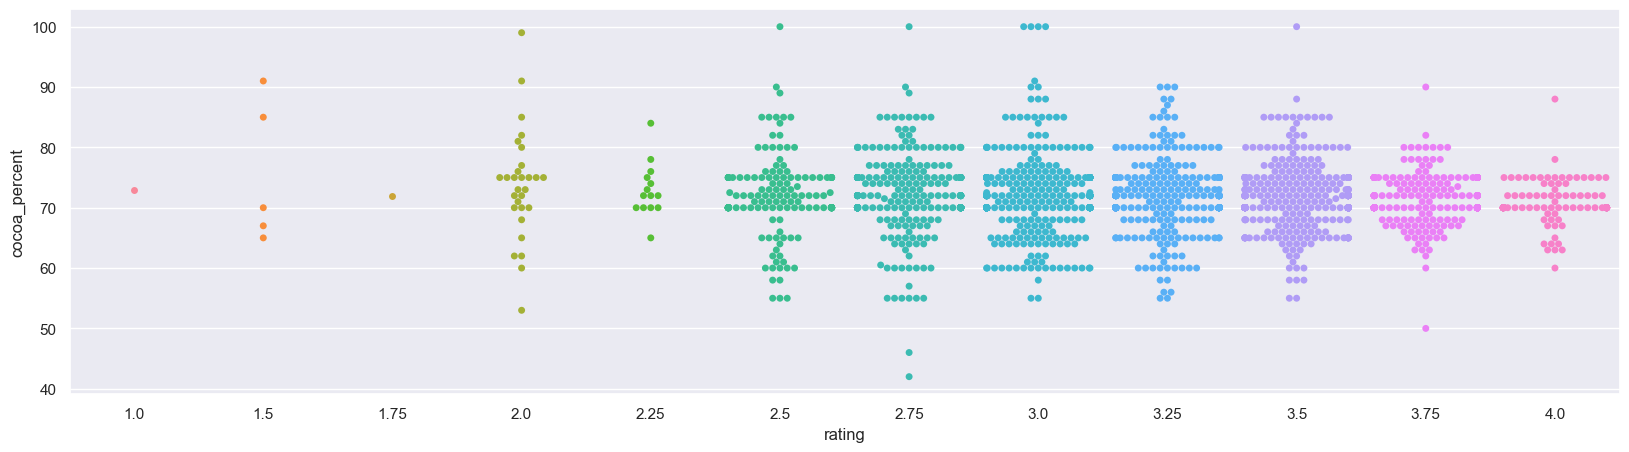

In [62]:
sns.swarmplot(x="rating",y="cocoa_percent",data=df)


In [63]:
avg_rating_with_lec = df[df["ingredients"].str.contains("L")].rating.mean()
avg_rating_without_lec = df[~df["ingredients"].str.contains("L")].rating.mean()
print("Average rating with lecithin "+str(avg_rating_with_lec))
print("Average rating without lecithin "+str(avg_rating_without_lec))

Average rating with lecithin 3.150608519269777
Average rating without lecithin 3.2251282051282053


In [68]:
year_bar_count = (df.groupby("year_reviewed").bar_name.count().reset_index().sort_values(by = ['year_reviewed','bar_name'],ascending = False))
                     
year_bar_count

,year_reviewed,bar_name
15,2021,175
14,2020,81
13,2019,193
12,2018,225
11,2017,103
10,2016,213
9,2015,280
8,2014,243
7,2013,177
6,2012,180


<AxesSubplot:xlabel='year_reviewed', ylabel='bar_name'>

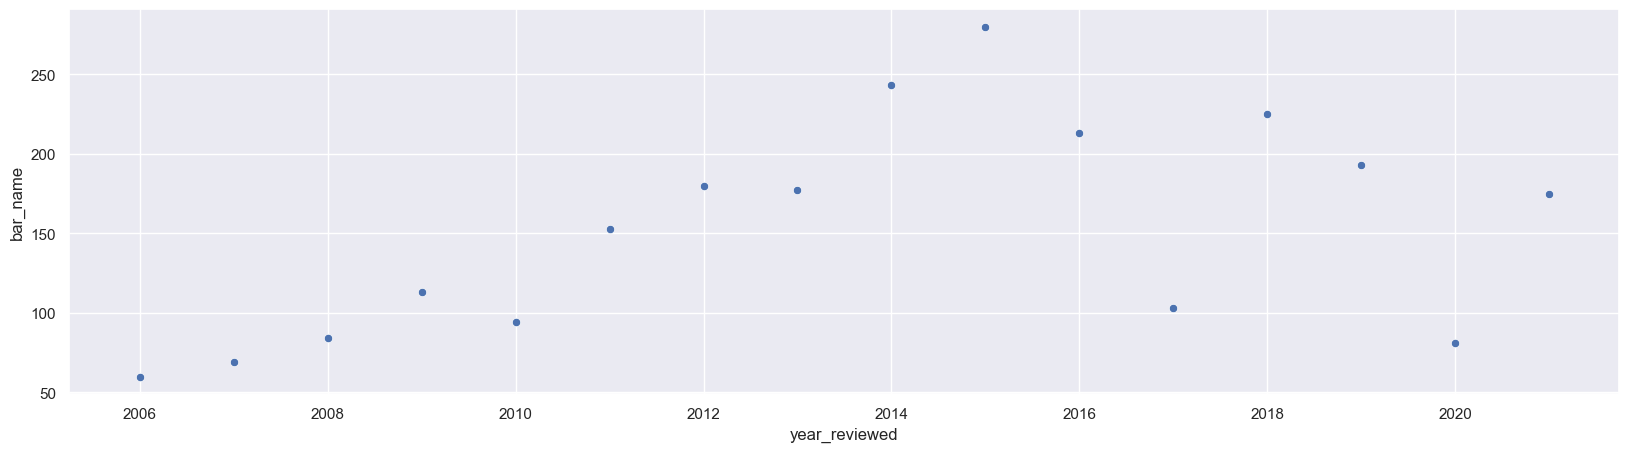

In [69]:
sns.scatterplot(x="year_reviewed",y="bar_name",data=year_bar_count)
